## Review of Last Wednesday

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

There are three ways to select data from a PANDAS data frame:

1. Direct method with names
2. .loc[row_names, column_names]
3. .iloc[row_indexes, column_indexes]


In [81]:
bikes = pd.read_csv('./bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

bikes[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [82]:
bikes.loc['2012-01-15':'2012-01-20',:] 
# Notice that the range is inclusive of the end points unlike tranditional Python

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-15,54,NaN,0,33,60,18,0,0,NaN
2012-01-16,168,NaN,2,136,312,137,1,0,NaN
2012-01-17,155,NaN,0,86,256,74,0,0,NaN
2012-01-18,139,NaN,0,66,188,68,3,0,NaN
2012-01-19,191,NaN,1,104,248,79,3,0,NaN
2012-01-20,161,NaN,4,96,217,67,1,1,NaN


In [11]:
bikes.iloc[-5:-1, :] # Notice that the range is not inclusive like Python usually is.

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN
2012-11-04,966,NaN,446,710,1277,692,197,1374,NaN


We can also do the same thing wil columns names

In [83]:
bikes[['Berri 1', 'du Parc', ]]

,Berri 1,du Parc
Date,,
2012-01-01,35,26
2012-01-02,83,53
2012-01-03,135,89
2012-01-04,144,111
2012-01-05,197,97
...,...,...
2012-11-01,2405,2076
2012-11-02,1582,1392
2012-11-03,844,713


In [13]:
bikes.loc[:, :'du Parc']

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc
Date,,,,,,
2012-01-01,35,NaN,0,38,51,26
2012-01-02,83,NaN,1,68,153,53
2012-01-03,135,NaN,2,104,248,89
2012-01-04,144,NaN,1,116,318,111
2012-01-05,197,NaN,2,124,330,97
...,...,...,...,...,...,...
2012-11-01,2405,NaN,1208,1701,3082,2076
2012-11-02,1582,NaN,737,1109,2277,1392
2012-11-03,844,NaN,380,612,1137,713


In [84]:
bikes.iloc[1:5, 2:6]

,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc
Date,,,,
2012-01-02,1,68,153,53
2012-01-03,2,104,248,89
2012-01-04,1,116,318,111
2012-01-05,2,124,330,97


# Chapter 4 - Grouping and Aggregating Data

This data is from Montreal.  One interesting question to ask is whether Montreal is a bike commuting city or a bike-playing city.  We would need to look at the data by weekday in order to determine this.

# 4.1 Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

<AxesSubplot:xlabel='Date'>

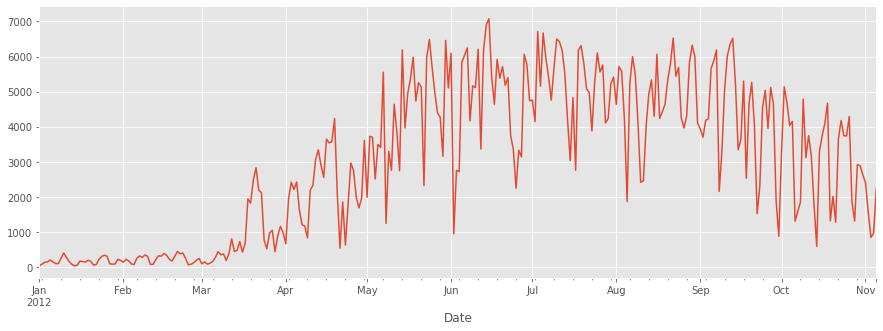

In [85]:
bikes['Berri 1'].plot()

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a heavily used bike path.

We're going to create a dataframe with just the Berri bikepath in it

In [86]:
berri_bikes = bikes[['Berri 1']].copy()
# Notice the copy.  Without the copy we are just taking a slice of the data.

In [87]:
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [88]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. As pointed out in class, this is because the dataset stops on November 5th.  That is nice to know since it means that we don't have any missing data.  It would be a bigger problem if the traffic wasn't counted every day of the week for example.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [89]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

We actually want the weekday, though:

In [90]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [91]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


# 4.2 Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [92]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [93]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


<AxesSubplot:>

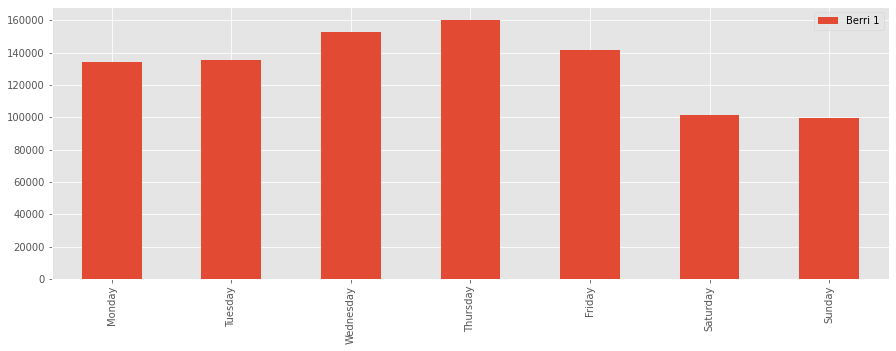

In [94]:
weekday_counts.plot(kind='bar')

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

# 4.3 Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

If you want to play around, try changing `sum` to `max`, `numpy.median`, or any other function you like.

<AxesSubplot:>

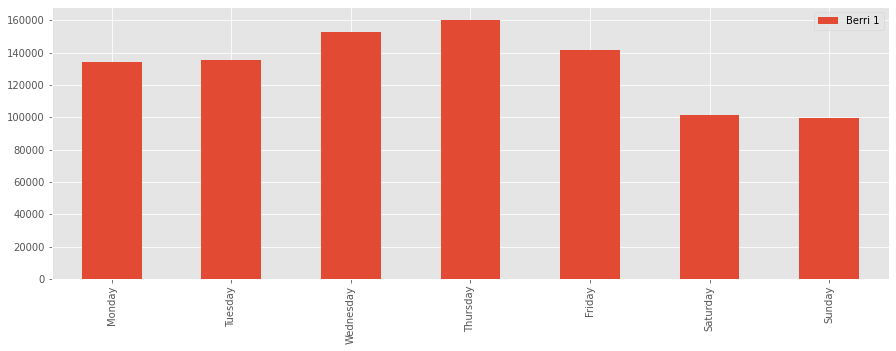

In [95]:
bikes = pd.read_csv('./bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

# Chapter 5 - More plotting

PANDAS and Matplotlib have all the basic plot types built in.  You can create:

- Histograms
- Scatterplots
- Line plots
- Bar charts (horzontal or vertical)
- Plus a lot of things you shouldn't use like pie charts and box plots

You can find a gallery of some of the more exotic types at [Matplotlib Documentation](https://matplotlib.org/3.3.2/tutorials/introductory/sample_plots.html). In most cases you can simply set the kind of the plot in the plot method.  If you want to do more advanced stuff however you can call matplotlib directly using the pyplot interface.

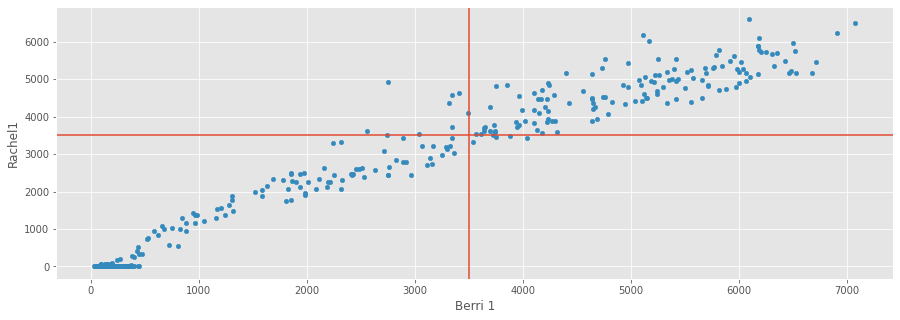

In [96]:
bikes.plot.scatter(x = 'Berri 1', y='Rachel1')
plt.axvline(3500)
plt.axhline(3500)

Once a plot is created you can add additional layers onto the top of it using the traditional matplotlib commands.  All the layers need to be added in the same code block on Jupyter Notebooks.  

In traditional scripts you would call `plt.show()` after "decorating" the plot to display it to the screen.  This happens automatically at the end of a code section on Jupyter.

Matplotlib has more than we could possible cover in a single lecture so the documentation is going to be essential.  I am still looking up things about customizing labels, axes, and titles all the time.  You can find the [Matplotlib Documentation](https://matplotlib.org/3.3.2/contents.html). This is a very active project so things are changing and improving all the time.  You may also want to check out add-on projects like [Seaborn](https://seaborn.pydata.org) which ass a lot of additional functionality to the basic plotting engine.

A couple helpful tips from the Matplotlib documentation: (This will help you know the terminology they use so it is easier to search for the right things.)

![Anatomy of an image](https://matplotlib.org/3.3.2/_images/anatomy.png)

# Chapter 6 - Data Types (dtypes)

As we have already discussed data types server an important purpose.  They are especially important for data analysis because the things that you can do to analyze something like a strong are different from the way that you would analyze a number.  

Data types is also something that easily gets messed up when importing data.  (Remember Tableau last semester when we had to go through and fix some data set to get the plots to render correctly.)  One of the really common ways to mess up data imports is to have a field with missing values.  Say for example that you have a field that is mostly ingeters, but there are some values missing.  What do you put in for those values?  You can't use an integer code like 0 or -1 since they will not be flagged as missing.  You could leave the sell in the csv file blank which is probably the best/default option, but you may not have created the data file.  One common thing that happens if somebody will put in a text label like "Missing" or "Unknown" to signify a missing value.  This cause a problem when you import the data file. Because the data is has a one or more "Strings" in that field, the entire field will be read in as a "String".  You need a way to tell PANDAS that this is actually a numeric column.

There are two primariy ways to handle this problem:

1. Specify the column types at import
2. Change columns types selectively after import

There are pros and cons to both methods.  One of the big issues however is that you often don't know there is a problem until after you look at the data and you can't look at the data withou importing it.  

In [97]:
service_data = pd.read_csv('./311-service-requests.csv')

/Users/jrhowell/.virtualenvs/MBA656ASite/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


This warning is a preview that we might have a problem with our columns types.

We can look at the data and see what the problems might be.

(The first anser to this Stack Overflow question is an excellent summary of what is happening here. [https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options](https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options))

In [98]:
service_data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"


From the warning it looks like `Incident Zip` is the problem column.  (The 9th column because of 0 based indexing)

We can check what type PANDAS decided to assign to each column using the `dtypes` attribute on the PANDAS object

In [99]:
service_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

It looks like the Zip Code was read in correctly as an object which is synonmyous with "String" in PANDAS.

We remove the error by specifying a datatype when we read the data in:

In [100]:
service_data = pd.read_csv('./311-service-requests.csv', dtype='unicode')
service_data.dtypes

Unique Key                        object
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Action Updated Date    object
Community Board                   object
Borough                           object
X Coordinate (St

Oh it looks like everything is an `object` now.  This will work for most of the dataset, but there are some things that we will want to be numbers.

In [101]:
service_data = pd.read_csv('./311-service-requests.csv', dtype={'Incident Zip' : 'unicode'})
service_data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

That looks better. No error and we told PANDAS what datatype to use for the column that it was confused about.  Notice that we only needed to specify the columns that we wanted to manually control.  (The `dtype` arguments takes a dictionary with the keys the column names and the values the type.  Look in the documentaation for the different types available.)

The second way to control column types is to change them after the fact.

In [102]:
service_data = pd.read_csv('./311-service-requests.csv', dtype='unicode')
service_data['Latitude'] = pd.to_numeric(service_data['Latitude'])
service_data.dtypes

Unique Key                         object
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

Sometimes there might be a string value in a numeric column likein our missing data example.  In those cases you will recieve an error and the conversion will fail.  You can specify `error=coerce` to force the conversion.  Any values that can't be converted will be considered missing values.

# Chapter 7 - Combining Data files

You will often want to combine data files.  The most common operation is to append new records to a data file, but you may also want to add new rows to a data file.  Both of these are important skills.

There are three main functions that we will be talking about:

- `merge` Merge will combine columns of a data file.  It works almost exactly like a JOIN statement from SQL.
- `concat` Concat will combine multiple data files that have the same columns.  Think about combining monthly data sets into a year data set.
- `append` Append will add a single record to a data file.  You will need to use this for your homework to add BYU to the dataset.  


Let's start with 'concat'

It turns out you can download a bunch of historical weather data in csv format from the Canadian weather service.  (We can do the same thing with the US weather service, but it is slightly more difficult.)



In [103]:
url_template = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&Day=14&timeframe=1&submit=%22Download+Data"


To get the data for March 2012, we need to format it with `month=3, year=2012`.

We are using a special Python function called a string formatter.  The function `format` takes a string and substitutes the values provided for special variables contained in {name} in the string so:

`'Hello {name}'.format(name='John')`

will return:

`Hello John`

This is nice because we can use the url template to supply and month and year to get the values that we want.

In [104]:
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, index_col='Date/Time', parse_dates=True, header=0)


We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [105]:
weather_mar2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear


Let's plot it!

<AxesSubplot:xlabel='Date/Time'>

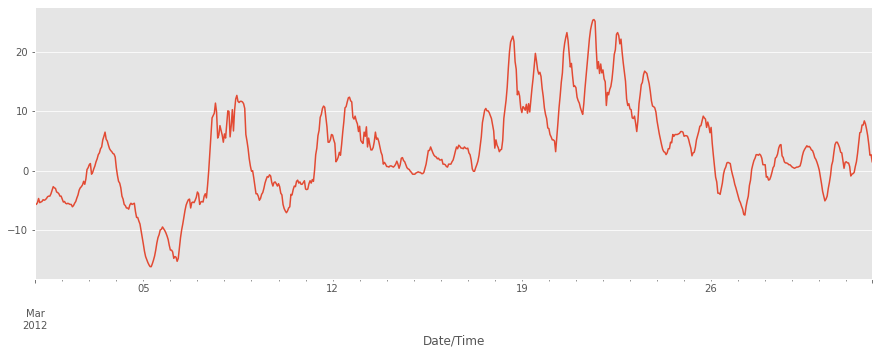

In [106]:
weather_mar2012["Temp (°C)"].plot(figsize=(15, 5))

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside in Montreal Canada.

Let's fix up the columns. We're going to just print them out, copy, and fix them up by hand.

In [107]:
weather_mar2012.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)',
       'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag',
       'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)',
       'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag',
       'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill',
       'Wind Chill Flag', 'Weather'],
      dtype='object')

In [108]:
weather_mar2012.columns = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Time', 'Temp (C)', 'Temp Flag', 'Dew Point Temp (C)',
       'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag',
       'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)',
       'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag',
       'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill',
       'Wind Chill Flag', 'Weather']

You'll notice in the summary above that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 

This is much better now -- we only have columns with real data.

In [109]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


The Year/Month/Day/Time columns are redundant. Let's get rid of those.

The `axis=1` argument means "Drop columns", like before. The default for operations like `dropna` and `drop` is always to operate on rows.

In [110]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
weather_mar2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-5.4,-7.8,83,35,1.6,100.62,Snow


Awesome! We now only have the relevant columns, and it's much more manageable.

# 7.2 Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

                     Temp (C)
Date/Time                    
2012-03-01 00:00:00      -5.5
2012-03-01 01:00:00      -5.7
2012-03-01 02:00:00      -5.4
2012-03-01 03:00:00      -4.7
2012-03-01 04:00:00      -5.4
...                       ...
2012-03-31 19:00:00       5.9
2012-03-31 20:00:00       4.4
2012-03-31 21:00:00       2.6
2012-03-31 22:00:00       2.7
2012-03-31 23:00:00       1.5

[744 rows x 1 columns]


<AxesSubplot:xlabel='Hour'>

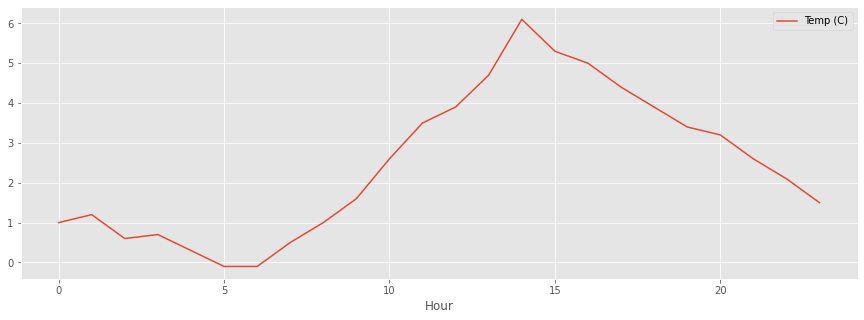

In [111]:
temperatures = weather_mar2012[['Temp (C)']].copy()
print(temperatures)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').median().plot()

So it looks like the time with the highest median temperature is 2pm.

# 7.3 Getting the whole year of data

Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month. 

In [117]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, index_col='Date/Time', parse_dates=True, header=0)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns] # This removes the degrees symbol 
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
    return weather_data

We can test that this function does the right thing:

In [118]:
download_weather_month(2012, 1)[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog


Now we can get all the months at once. This will take a little while to run.

In [119]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using `pd.concat`. And now we have the whole year's data!

In [121]:
weather_2012 = pd.concat(data_by_month)
weather_2012

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-0.5,-1.5,93,28,4.8,99.95,Snow


# 5.4 Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [122]:
weather_2012.to_csv('./weather_2012.csv')

And we're done!

# 5.5 Merging Data Files

Now that we can combine data files that contain the same data, how do we combine data files by joining them.

Ther eis a command `merge` that will makes this easy.  It uses the same terminology as SQL so it should be familiar.

We probably want to combine the low temperature for each day with the biking numbers so we can see how temperature affects how many people bike.

The first step is to find the low temperature for each day.  `groupby` to the rescue.

In [132]:
weather_daily_min = weather_2012.groupby(weather_2012.index.date).min('Temp (C)')
weather_daily_min[:5]

Index(['Longitude (x)', 'Latitude (y)', 'Climate ID', 'Temp (C)',
       'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)'],
      dtype='object')

In [133]:
bikes[:5]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [139]:
bikes_weather = bikes.merge(weather_daily_min, left_index=True, right_index=True)
bikes_weather.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles),Longitude (x),Latitude (y),Climate ID,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
2012-01-01,35,NaN,0,38,51,26,10,16,NaN,-73.75,45.47,7025250,-1.8,-3.9,79,4,1.2,99.31
2012-01-02,83,NaN,1,68,153,53,6,43,NaN,-73.75,45.47,7025250,-7.4,-14.7,54,17,19.3,99.14
2012-01-03,135,NaN,2,104,248,89,3,58,NaN,-73.75,45.47,7025250,-17.3,-25.4,49,15,12.9,100.35
2012-01-04,144,NaN,1,116,318,111,8,61,NaN,-73.75,45.47,7025250,-18.6,-24.6,51,6,4.8,100.42
2012-01-05,197,NaN,2,124,330,97,13,95,NaN,-73.75,45.47,7025250,-9.9,-15.7,55,0,4.0,100.19


<AxesSubplot:xlabel='Berri 1', ylabel='Temp (C)'>

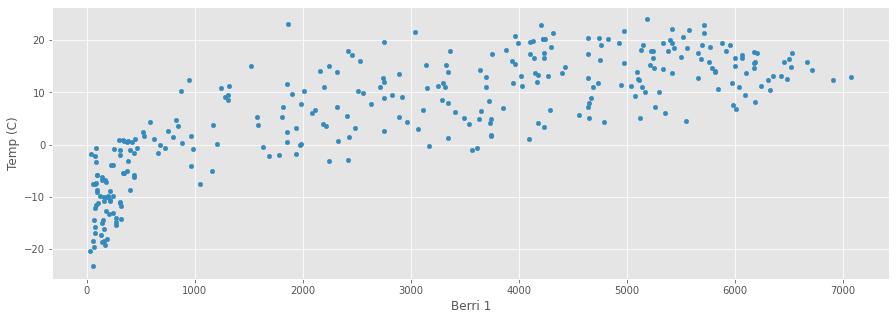

In [141]:
bikes_weather.plot.scatter(x = 'Berri 1', y = 'Temp (C)')

There are a lot of options for merge that you should be aware of.  It works a lot like SQL, but I find it a little easier.

# 5.6 Appending a single data file

Pandas has an `.append()` method that will allow you to add a single data file to program.

This is not somethign that you should use very often.  The problem is that it has to copy the entire dataframe whenever you add a single row.  This is a very time consuming operation when you have a lot of data.  For small datasets however it is not really a problem.

Append takes either a PANDAS data Series or a dictionary.  For a single row I find a dictionary easier to work with.

A dictionary is an unordered collection of items each of which is identified by a 'key'.  Thus a dictionary has two parts a 'key' and a 'value'.  You create a dictionary like so:

In [154]:
new_data = {'Berri 1' : 2247.0, 'Brébeuf (données non disponibles)' : 0.0, 'Côte-Sainte-Catherine' : 1170.0,
           'Maisonneuve 1' : 1705.0, 'Maisonneuve 2' : 3221.0, 'du Parc' : 2143.0, 'Pierre-Dupuy' : 179.0, 
           'Rachel1' : 2430.0, 'St-Urbain (données non disponibles)' : 0.0}

`bikes.append(new_data)` would normally append the data to our bikes data, but we have an index so we have to use the Series method.


In [155]:
next_day = pd.Series(new_data.values(), index=new_data.keys(), name = '2012-11-06')
next_day



Berri 1                                2247.0
Brébeuf (données non disponibles)         0.0
Côte-Sainte-Catherine                  1170.0
Maisonneuve 1                          1705.0
Maisonneuve 2                          3221.0
du Parc                                2143.0
Pierre-Dupuy                            179.0
Rachel1                                2430.0
St-Urbain (données non disponibles)       0.0
Name: 2012-11-06, dtype: float64

In [157]:
bikes = bikes.append(next_day)
bikes.tail()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-11-02 00:00:00,1582.0,NaN,737.0,1109.0,2277.0,1392.0,97.0,1888.0,NaN
2012-11-03 00:00:00,844.0,NaN,380.0,612.0,1137.0,713.0,105.0,1302.0,NaN
2012-11-04 00:00:00,966.0,NaN,446.0,710.0,1277.0,692.0,197.0,1374.0,NaN
2012-11-05 00:00:00,2247.0,NaN,1170.0,1705.0,3221.0,2143.0,179.0,2430.0,NaN
2012-11-06,2247.0,0.0,1170.0,1705.0,3221.0,2143.0,179.0,2430.0,0.0
